### Time to analyse that data! Firs let's import all libraries and create a also out *clean_sharks.csv* into a new dataframe for analysis. Also, let's only keep "proven" shark attacks. That is, we will discard registers in which the "Type" variable is set to "Invalid":

In [21]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

clean_sharks = pd.read_csv('./clean_sharks.csv',sep=",")
clean_sharks = clean_sharks[clean_sharks["Type"]!="Invalid"]
clean_sharks.head(1)

,Month,Year,Type,Country,Area,Location,Activity,Sex,Age,Age range,Injury,Fatal,Time,Time of day,Species,Case Number,Date
0,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,12-17,Minor injury to thigh,N,13h00,1. Afternoon,Unknown,2016.09.18.c,18-Sep-16


In [22]:
clean_sharks["Type"].value_counts()

Unprovoked      3975
Provoked         508
Boat             280
Sea Disaster     169
Name: Type, dtype: int64

## Now I'll try to confirm or different hypothesis:

### 0. "Men are more likely to survive a shark attack than women":

In [65]:
sharks0 = clean_sharks.copy()[clean_sharks["Sex"]!="Unknown"]
men_women = pd.DataFrame()
men_women ["Reported attacks"] = sharks0.groupby(["Sex"]).count()["Fatal"]
men_women ["Avg Age"] = sharks0[sharks0["Age"] > 0].groupby(["Sex"]).mean()["Age"]
men_women ["Survived"] = sharks0[sharks0["Fatal"]=="N"].groupby(["Sex"]).count()["Fatal"]
men_women ["Died"] = sharks0[sharks0["Fatal"]=="Y"].groupby(["Sex"]).count()["Fatal"]
men_women ["Unknown"] = sharks0[sharks0["Fatal"]=="Unknown"].groupby(["Sex"]).count()["Fatal"]
men_women ["Survival rate"] = round((men_women["Survived"]/(men_women["Survived"]+men_women["Died"]))*100,2)
men_women = men_women.reset_index().rename_axis(None).rename_axis(None, axis=1)
men_women


,Sex,Reported attacks,Avg Age,Survived,Died,Unknown,Survival rate
0,F,471,26.603933,382,85,4,81.80
1,M,4021,26.870183,3074,912,35,77.12


Well look at that! Of course I was wrong, I was just emmmm... trying to prove women are stronger than men!
The data shows that, based on the reported shark attacks, almost 82% of women have survived an attack while 77% of men have survived. Let's see what happens if we throw in age into the equation.

### 1. "Children are more likely to die in a shark attack":

In [59]:
sharks1 = clean_sharks.copy()[(clean_sharks["Sex"]!="Unknown")&(clean_sharks["Age range"]!="Unknown")]
age = pd.DataFrame()
men_women_age ["Reported attacks"] = sharks1.groupby(["Sex","Age range"]).count()["Fatal"]
men_women_age ["Survived"] = sharks1[sharks1["Fatal"]=="N"].groupby(["Sex","Age range"]).count()["Fatal"]
men_women_age ["Died"] = sharks1[sharks0["Fatal"]=="Y"].groupby(["Sex","Age range"]).count()["Fatal"]
men_women_age ["Survival rate"] = round((men_women_age["Survived"]/(men_women_age["Survived"]+men_women_age["Died"]))*100,2)
men_women_age.fillna(0,inplace=True)
men_women_age = men_women_age.reset_index().rename_axis(None).rename_axis(None, axis=1)
men_women_age

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Sex,Age range,Reported attacks,Survived,Died,Survival rate
0,F,1-12,47,44.0,3,93.62
1,F,12-17,92,81.0,10,89.01
2,F,18-24,71,55.0,16,77.46
3,F,25-34,47,38.0,9,80.85
4,F,35-44,41,35.0,6,85.37
5,F,45-54,24,21.0,3,87.50
6,F,55-64,25,21.0,4,84.00
7,F,65-74,7,3.0,4,42.86
8,F,75+,2,0.0,2,0.00
9,M,1-12,122,102.0,20,83.61


In [60]:
sharks2 = clean_sharks.copy()[(clean_sharks["Age range"]!="Unknown")]
age = pd.DataFrame()
age ["Reported attacks"] = sharks1.groupby(["Age range"]).count()["Fatal"]
age ["Survived"] = sharks1[sharks1["Fatal"]=="N"].groupby(["Age range"]).count()["Fatal"]
age ["Died"] = sharks1[sharks0["Fatal"]=="Y"].groupby(["Age range"]).count()["Fatal"]
age ["Survival rate"] = round((age["Survived"]/(age["Survived"]+age["Died"]))*100,2)
age.fillna(0,inplace=True)
age = age.reset_index().rename_axis(None).rename_axis(None, axis=1)
age

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Age range,Reported attacks,Survived,Died,Survival rate
0,1-12,169,146,23,86.39
1,12-17,614,498,111,81.77
2,18-24,739,578,157,78.64
3,25-34,602,497,105,82.56
4,35-44,352,298,54,84.66
5,45-54,209,175,34,83.73
6,55-64,97,80,17,82.47
7,65-74,31,19,12,61.29
8,75+,8,4,4,50.00


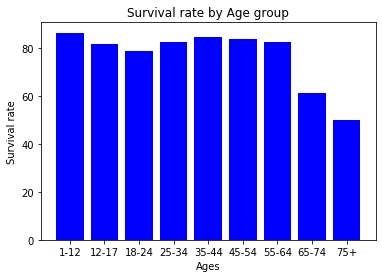

In [64]:
plt.bar(age['Age range'],age['Survival rate'], color='blue', sketch_params=False)
plt.title('Survival rate by Age group')
plt.xlabel('Ages')
plt.ylabel('Survival rate')
plt.show()

Once again I've been proven wrong. The data shows that children actually have a higher survival rate (86%) than the rest of age groups. In fact, people who are 75+ years old are group with the lowest survival rate.  

### 2. "Shark attack reports have increased through the years, but the number of attacks that end in death has decreased"

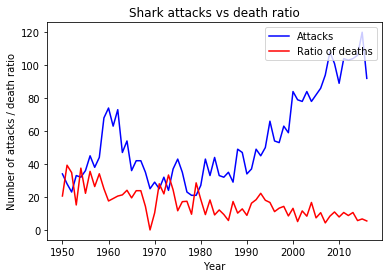

In [84]:
sharks3=clean_sharks[clean_sharks["Year"] >= 1950]

years = pd.DataFrame()
years ["Attacks"] = sharks3.groupby(["Year"]).count()["Month"]
years ["Deaths"] = sharks3[sharks3["Fatal"]=="Y"].groupby(["Year"]).count()["Month"]
years ["Deaths ratio"] = (years ["Deaths"]/years ["Attacks"])*100
years.fillna(0,inplace=True)
years = years.reset_index().rename_axis(None).rename_axis(None, axis=1)

plt.plot(years.groupby(["Year"]).sum()["Attacks"], label = 'Attacks', c='blue')
plt.plot(years.groupby(["Year"]).sum()["Deaths ratio"], label = 'Ratio of deaths', c='red')
plt.legend(loc=1)
plt.title('Shark attacks vs death ratio')
plt.xlabel('Year')
plt.ylabel('Number of attacks / death ratio')
plt.show()


We can see that, indeed, shark attack reports have increased in the las 30-40 years. However, the ratio between deaths and reports has decreased, which means that either the number of deaths by shark attack have decreased or stayed the same for the last 30-40 years. Let's confirm what's going on with deaths by shark attack by looking at the next chart:

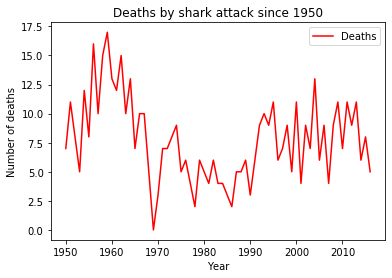

In [85]:
plt.plot(years.groupby(["Year"]).sum()["Deaths"], label = 'Deaths', c='red')
plt.legend(loc=1)
plt.title('Deaths by shark attack since 1950')
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.show()

### 3. "*More people == more attacks*. The number of attack reports increases along with the human population growth":

To prove this I will need to import a new dataset that contains countries' populations by year from 1960 to 2016.